In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../model/vgsales.csv')
X = df[['Name','Platform','Year', 'Genre', 'Publisher']]
Y = df[['Global_Sales']]
Sales = df.iloc[: , 6:11 ]

In [2]:
Y.head()

,Global_Sales
0,82.74
1,40.24
2,35.82
3,33.00
4,31.37


In [4]:
X.head()

,Name,Platform,Year,Genre,Publisher
0,Wii Sports,Wii,2006,Sports,Nintendo
1,Super Mario Bros.,NES,1985,Platform,Nintendo
2,Mario Kart Wii,Wii,2008,Racing,Nintendo
3,Wii Sports Resort,Wii,2009,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo


In [5]:
Sales = df.iloc[: , 6:11 ]
Sales.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,41.49,29.02,3.77,8.46,82.74
1,29.08,3.58,6.81,0.77,40.24
2,15.85,12.88,3.79,3.31,35.82
3,15.75,11.01,3.28,2.96,33.00
4,11.27,8.89,10.22,1.00,31.37


In [6]:
code = df.iloc[: , 12:13]
code.head()

""
0
1
2
3
4


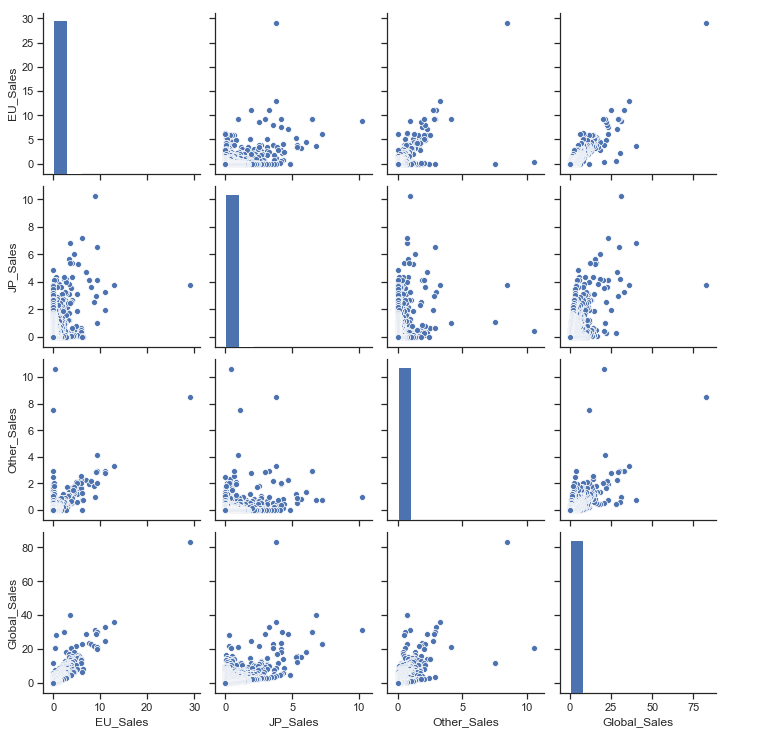

In [7]:
#scatter plot to show relation between all sales
import seaborn as sns
sns.set(style = 'ticks', color_codes='True')
g = sns.pairplot(Sales)

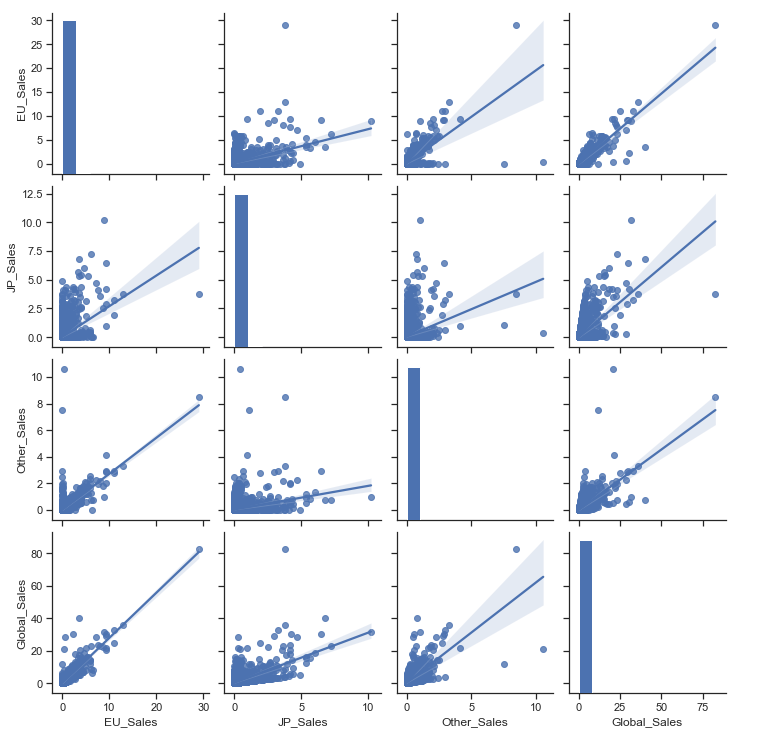

In [8]:
#Fit Linear Regression models to the scatter plot
g = sns.pairplot(Sales, kind = 'reg')

In [9]:
Y.isna().sum() #sum of null values in Y

Global_Sales    0
dtype: int64

In [10]:
X.isna().sum() #sum of null values in X

Name           0
Platform       0
Year         271
Genre          0
Publisher     58
dtype: int64

In [11]:
X.Year.fillna(method = 'pad') #fill with previous value
X.Publisher.fillna(method = 'bfill') #fill with next value

0                           Nintendo
1                           Nintendo
2                           Nintendo
3                           Nintendo
4                           Nintendo
5                           Nintendo
6                           Nintendo
7                           Nintendo
8                           Nintendo
9                           Nintendo
10                          Nintendo
11                          Nintendo
12                          Nintendo
13                          Nintendo
14                          Nintendo
15            Microsoft Game Studios
16              Take-Two Interactive
17              Take-Two Interactive
18                          Nintendo
19                          Nintendo
20                          Nintendo
21                          Nintendo
22                          Nintendo
23              Take-Two Interactive
24              Take-Two Interactive
25                          Nintendo
26                          Nintendo
2

In [12]:
# Converting Categorical Data to Numbers
X = pd.get_dummies(data=X, drop_first = True)
print(X.shape)


(16598, 12169)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 40)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(13278, 12169)
(3320, 12169)
(13278, 1)
(3320, 1)


In [ ]:
# splitting our data into train and test model and printing its shape

from sklearn import linear_model

lm = linear_model.LinearRegression()

model    = lm.fit(X_train, y_train) #fitting our training data in the model
predictions = lm.predict(X_test)

predicted[0:5]

In [ ]:
plt.(y_test,predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
print('Score: ', model.score(X_test,y_test))
len(X_test)